# Polynomial Regression

## 1. Import Libraries

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score

## 2. Load Data

In [156]:
path=r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'
df = pd.read_csv(path)

df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Reorganize Columns

In [157]:
df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Data Set

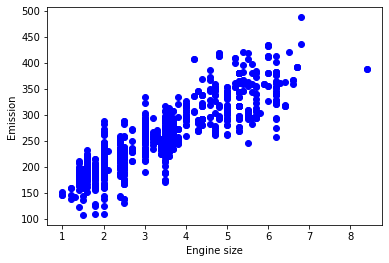

In [158]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## 3. Split Data Into Training & Test
80% Training, 20% Test

In [159]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

Training Set

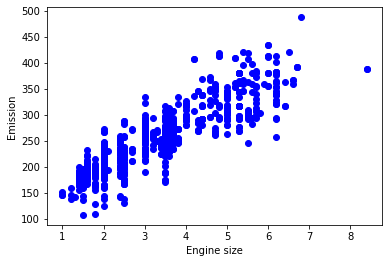

In [160]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Test Set

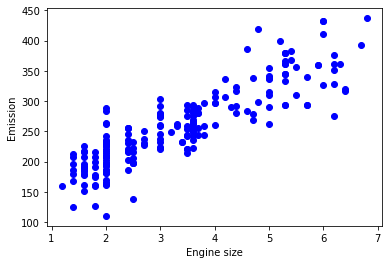

In [161]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## 4. Algorithm

Polynomial Regression

$$
y = \theta_{0}  x_{0} + \theta_{1}  x_{1} + \theta_{2} x_{2}
$$

In [162]:
X_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

X_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

XX_train = train['ENGINESIZE']
yy_test = test['CO2EMISSIONS']

XX_train = train['ENGINESIZE']
yy_test = test['CO2EMISSIONS']

In [163]:
input = [('polynomial',PolynomialFeatures(degree=2)),('modal',linear_model.LinearRegression())]
pipe = Pipeline(input)
pipe.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

In [164]:
y_hat = pipe.predict(X_train.reshape(-1,1))

# sorting predicted values with respect to predictor
sorted_zip = sorted(zip(X_train,y_hat))
X_train_sorted, y_hat = zip(*sorted_zip)

In [165]:
# poly = PolynomialFeatures(degree=2)
# poly_features = poly.fit_transform(X_train)

# poly_features

# regr = linear_model.LinearRegression()
# regr.fit(poly_features, y_train)

# # The coefficients
# print ('Coefficients: ', regr.coef_)
# print ('Intercept: ', regr.intercept_)

# XX = np.arange(0.0, 10.0, 0.1)
# yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)

# eq = regr.coef_[0]
# eq[0] = regr.intercept_
# print(eq)

## 5. Optimization
Ordinary Least Square (OLS) (Normal Equation)

$$
Ɵ=(X^T X)^{-1} X^T y
$$

Minimizes the Residual Sum of Squares (RSS).

0 - ꚙ	(Negatively Orientated)
$$
RSS = \sum \limits _{i=1} ^{n} (y_i-(\hat{y_i}))^2
$$

## 6. Prediction

Text(0, 0.5, 'Emission')

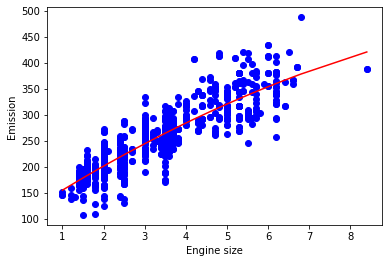

In [166]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(X_train_sorted, y_hat, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

## 7. Evaluation/Accuracy

Mean Absolute Error (MAE)

0 - ꚙ	Negatively Orientated

$$
MAE = \frac{1}{n} \sum \limits _{i=1} ^{n} |y_i-(\hat{y_i})|
$$

In [167]:
y_hat = pipe.predict(X_test.reshape(-1,1))

# sorting predicted values with respect to predictor
sorted_zip = sorted(zip(X_test,y_hat))
X_test_sorted, y_hat_sorted = zip(*sorted_zip)

Text(0, 0.5, 'Emission')

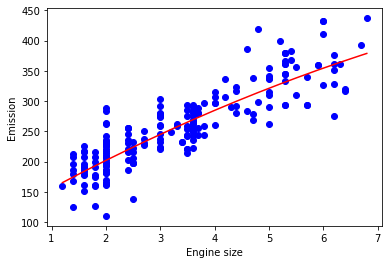

In [168]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='blue')
plt.plot(X_test_sorted, y_hat_sorted, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [169]:
print("Mean Absolute Error (MAE): %.2f" % np.mean(np.absolute(y_hat - y_test)))

Mean Absolute Error (MAE): 25.15


Residual Sum of Squares (RSS)

0 - ꚙ	(Negatively Orientated)
$$
RSS = \sum \limits _{i=1} ^{n} (y_i-(\hat{y_i}))^2
$$

In [170]:
print("Residual Sum of Squares (RSS): %.2f" % np.mean((y_hat - y_test) ** 2))

Residual Sum of Squares (RSS): 1039.42


Coefficient of Determination (R^2 Score)

$$
R^2 = 1 - \frac{RSS}{TSS}
$$

R^2 : Coefficient of Determination

RSS : Residual Sum of Squares

TSS : Total Sum of Squares

In [171]:
print("R2-score: %.2f" % r2_score(y_test, y_hat))

R2-score: 0.77
